In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Call%20Center%20Data.csv')
df.head()

,Experience in months,Call Attended in a day
0,12,30
1,24,35
2,60,45
3,72,50
4,84,50


In [3]:
#apply knee rule to identify number of cluster

from sklearn.cluster import KMeans

losses = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  losses.append(kmeans.inertia_)

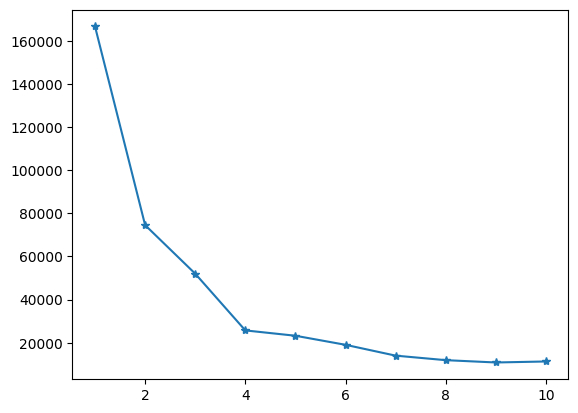

In [4]:
plt.plot(range(1,11),losses,marker = '*')
plt.show()

In [5]:
#form those clusters
model1 = KMeans(n_clusters=4)
model1.fit(df)

KMeans(n_clusters=4)

In [6]:
#find centers of each cluster

In [7]:
pd.DataFrame(model1.cluster_centers_,columns=df.columns)

,Experience in months,Call Attended in a day
0,82.333333,85.410256
1,29.685714,39.571429
2,92.250000,39.250000
3,28.760000,83.680000


In [8]:
df['Labels'] = model1.predict(df)
df.head()

,Experience in months,Call Attended in a day,Labels
0,12,30,1
1,24,35,1
2,60,45,1
3,72,50,2
4,84,50,2


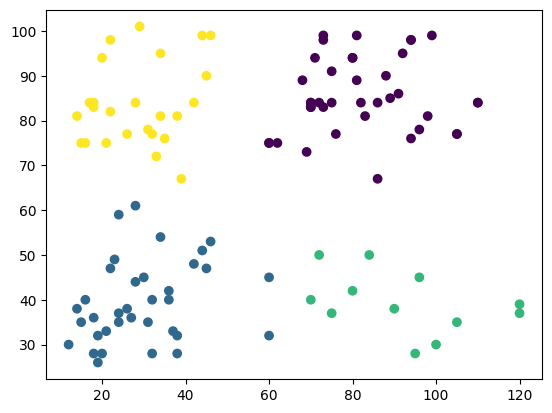

In [9]:
plt.scatter(df['Experience in months'],df['Call Attended in a day'],c=df['Labels'])
plt.show()

**Mall Data for clustering**

In [11]:
df_mall = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/mall.csv')
df_mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
dfm = df_mall.loc[:,'Age':'Spending Score (1-100)']
dfm.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


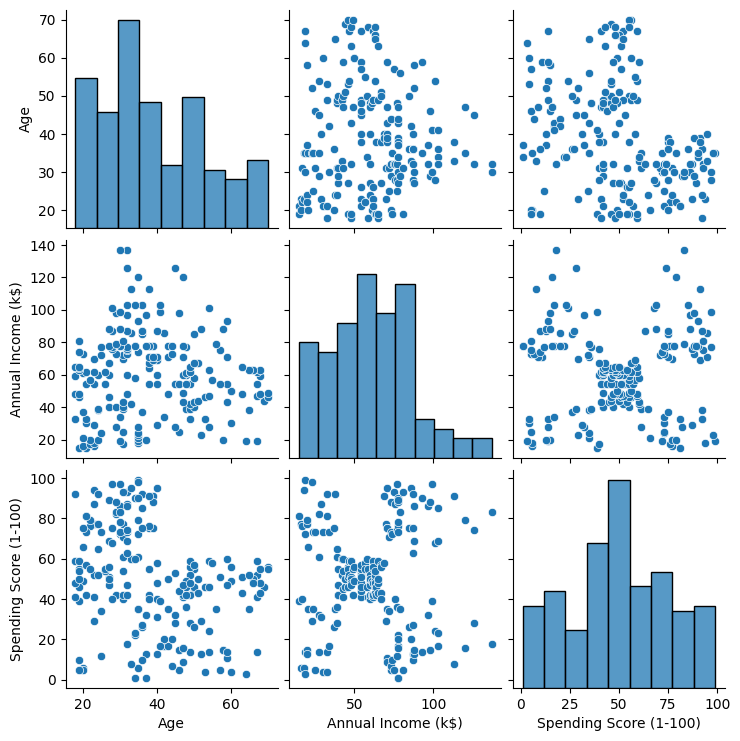

In [13]:
sns.pairplot(dfm)

In [14]:
dfm1 = dfm.copy()

In [15]:
model1 = KMeans(n_clusters=5)
model1.fit(dfm1)

pd.DataFrame(model1.cluster_centers_ , columns = dfm1.columns)

,Age,Annual Income (k$),Spending Score (1-100)
0,32.692308,86.538462,82.128205
1,43.727273,55.480519,49.324675
2,40.666667,87.750000,17.583333
3,45.217391,26.304348,20.913043
4,24.960000,28.040000,77.000000


In [16]:
dfm1['Labels'] = model1.predict(dfm1)
dfm1.head()

,Age,Annual Income (k$),Spending Score (1-100),Labels
0,19,15,39,3
1,21,15,81,4
2,20,16,6,3
3,23,16,77,4
4,31,17,40,3


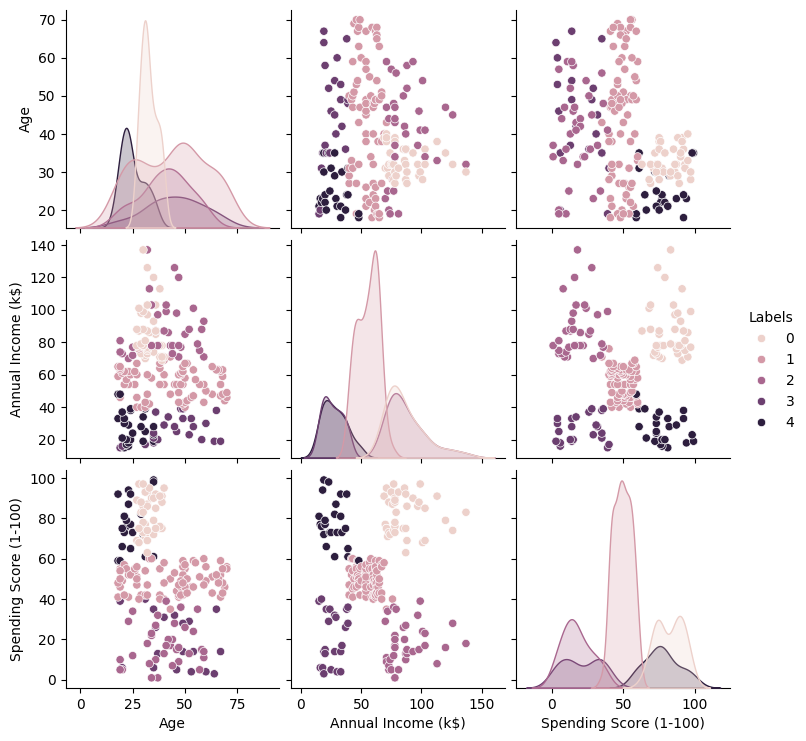

In [17]:
sns.pairplot(dfm1,hue='Labels')
plt.show()

In [18]:
#Knee rule to decide plot

dfm2 = dfm.copy()

losses = []

for i in range(1,11):
  model2 = KMeans(n_clusters=i)
  model2.fit(dfm2)

  losses.append(model2.inertia_)

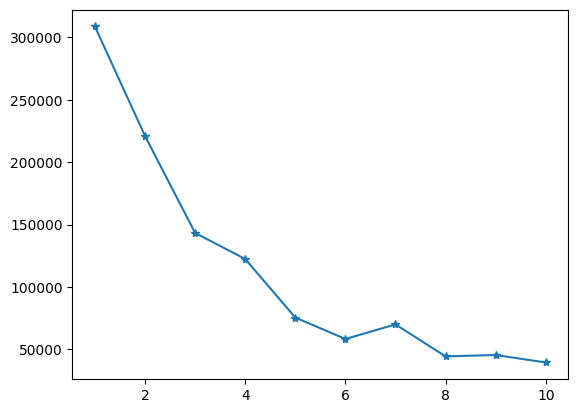

In [19]:
plt.plot(range(1,11),losses,marker='*')
plt.show()

In [20]:
model3 = KMeans(n_clusters=6)
model3.fit(dfm2)

cluster_centers = pd.DataFrame(model3.cluster_centers_ , columns = dfm2.columns)
cluster_centers

,Age,Annual Income (k$),Spending Score (1-100)
0,56.340909,53.704545,49.386364
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,41.685714,88.228571,17.285714
4,44.318182,25.772727,20.272727
5,27.000000,56.657895,49.131579


<Axes: >

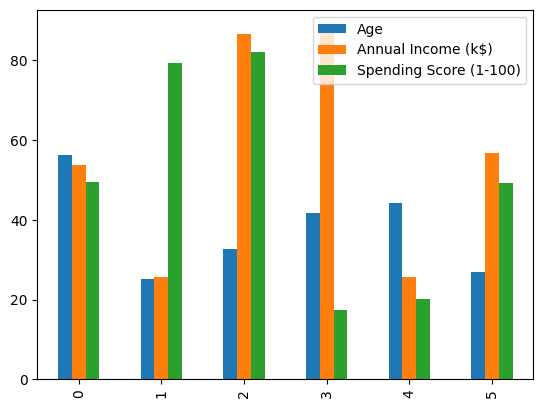

In [21]:
cluster_centers.plot.bar()

In [22]:
dfm2['Labels'] = model3.predict(dfm2)

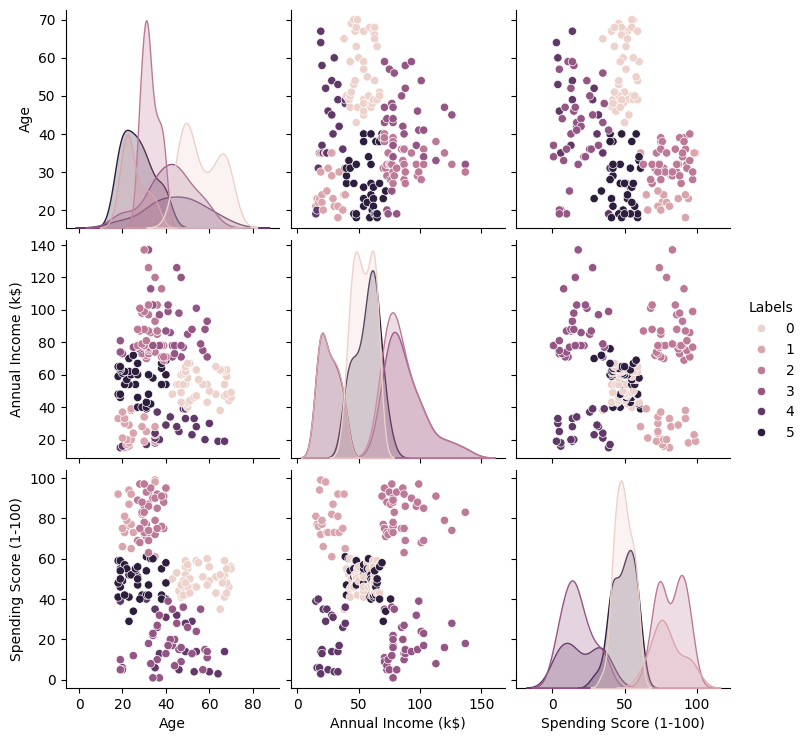

In [23]:
sns.pairplot(dfm2,hue='Labels')
plt.show()

In [24]:
dfm2.head()

,Age,Annual Income (k$),Spending Score (1-100),Labels
0,19,15,39,4
1,21,15,81,1
2,20,16,6,4
3,23,16,77,1
4,31,17,40,4


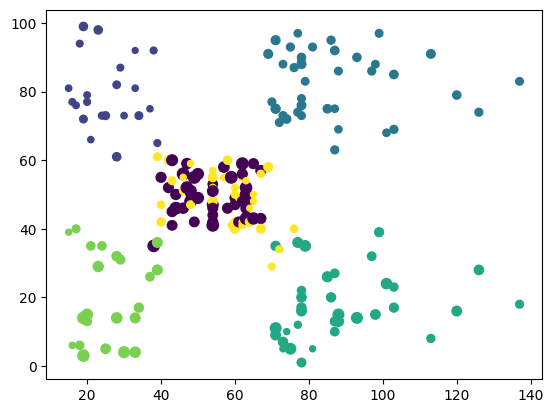

In [25]:
plt.scatter(dfm2['Annual Income (k$)'],dfm2['Spending Score (1-100)'],c=dfm2['Labels'],s=dfm2['Age'])
plt.show()

<Figure size 1000x800 with 0 Axes>

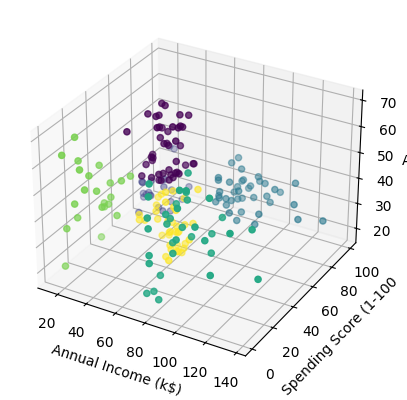

In [26]:
#create a 3D plot using Age, Income & Expenses

plt.figure(figsize=(10,8))
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(dfm2['Annual Income (k$)'], dfm2['Spending Score (1-100)'] , zs=dfm2['Age'], zdir='z', c = dfm2['Labels'])
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100')
ax.set_zlabel('Age')

plt.show()